<a href="https://colab.research.google.com/github/Legacy560/MLTSA25_RWolynetz/blob/main/HW7/Clustering_businesstimeseries_instructions_MLTSA25_RWolynetz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series clustering exercise

# Data

The data is on the github repo. It can also be gotten directly from the Census Boureau and from NYC open data.

Each file is the economic census for 1 year.
Download it programmatically and move it to PUIdata

data link https://github.com/fedhere/MLTSA_FBianco/blob/main/data/nyc_zpb_est_1994_2014.csv



make sure yuo read it so that the index column is the zipcode

In [1]:
#Github installations

!pip install PyGithub
!pip install pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 12.3 MB/s eta 0:00:00


In [2]:
#all imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.impute import KNNImputer

In [3]:
# read in the business data: this is the number of licenced business per zipcode in NYC from 1994 through 2014
df = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/nyc_zpb_est_1994_2014.csv', index_col=0)
df.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,57.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,493.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,527.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,422.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1180.0,1687.0,1736.0


In [4]:
#Getting into my google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
cd gdrive/My\ Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework\ 7


/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework 7


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check. you should have 21(N_timestamps) datapoints per time series and about 239 zipcodes (Nzipcodes)

- drop all rows with 10 missing values or more
- impute missing values using k nearest neighbors with k=5 (you can use AI prompts to do that)


mydata.shape should be (Nzipcodes, Ntimestamps)



In [7]:
df.shape

(248, 21)

<Axes: >

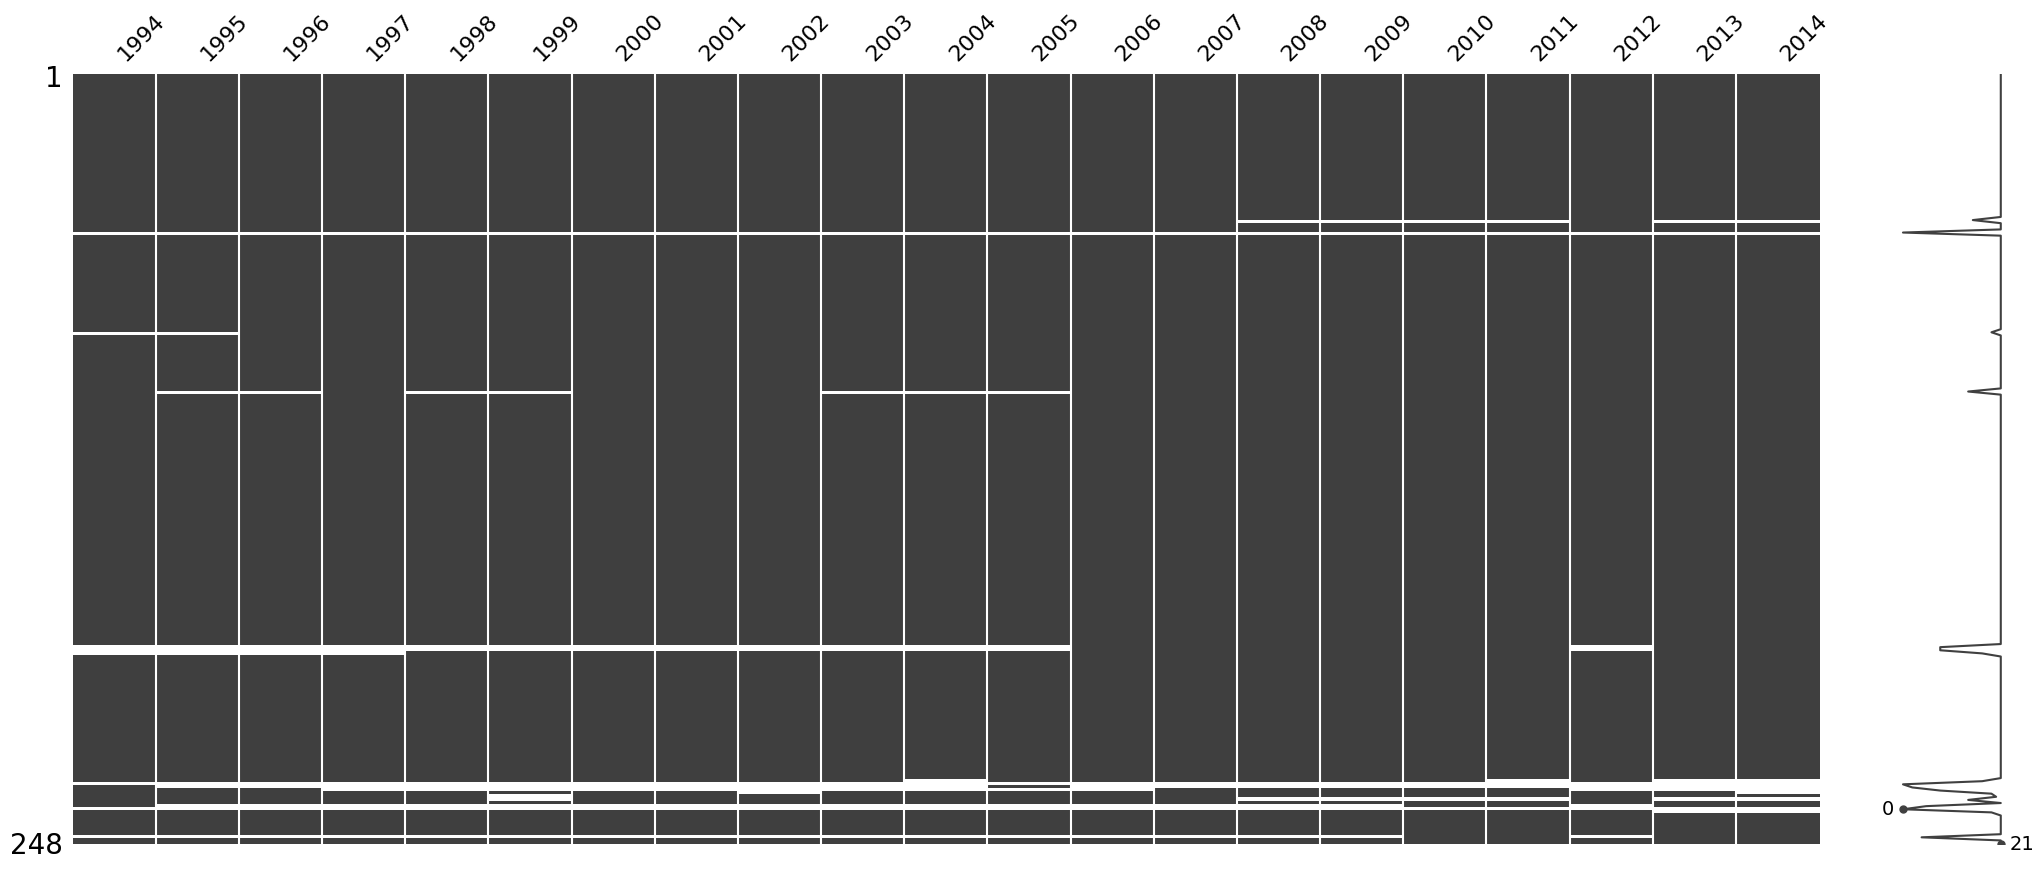

In [6]:
import missingno as mno
mno.matrix(df)

Figure 1: This is a more visual representation of our dataset. The columns are listed at the top horizontal axis and the rows are listed on the left vertical axis. All white spaces in this plot represent missing values. This makes it easier to see where the missing values in our dataset are as opposed to just staring at an Excel sheet for 6 hours. We can see from this plot that a few of our rows contain no values whatsoever. Many of these rows exist at the bottom of our dataset. The rest of the rows are either full or mostly full.

In [7]:
#drop all rows with 10 missing values or more

df.dropna(axis = 0, thresh=12, inplace=True) #thresh = 12: we want to keep all rows with at least 12 non-NaN values.
df.shape

(239, 21)

<Axes: >

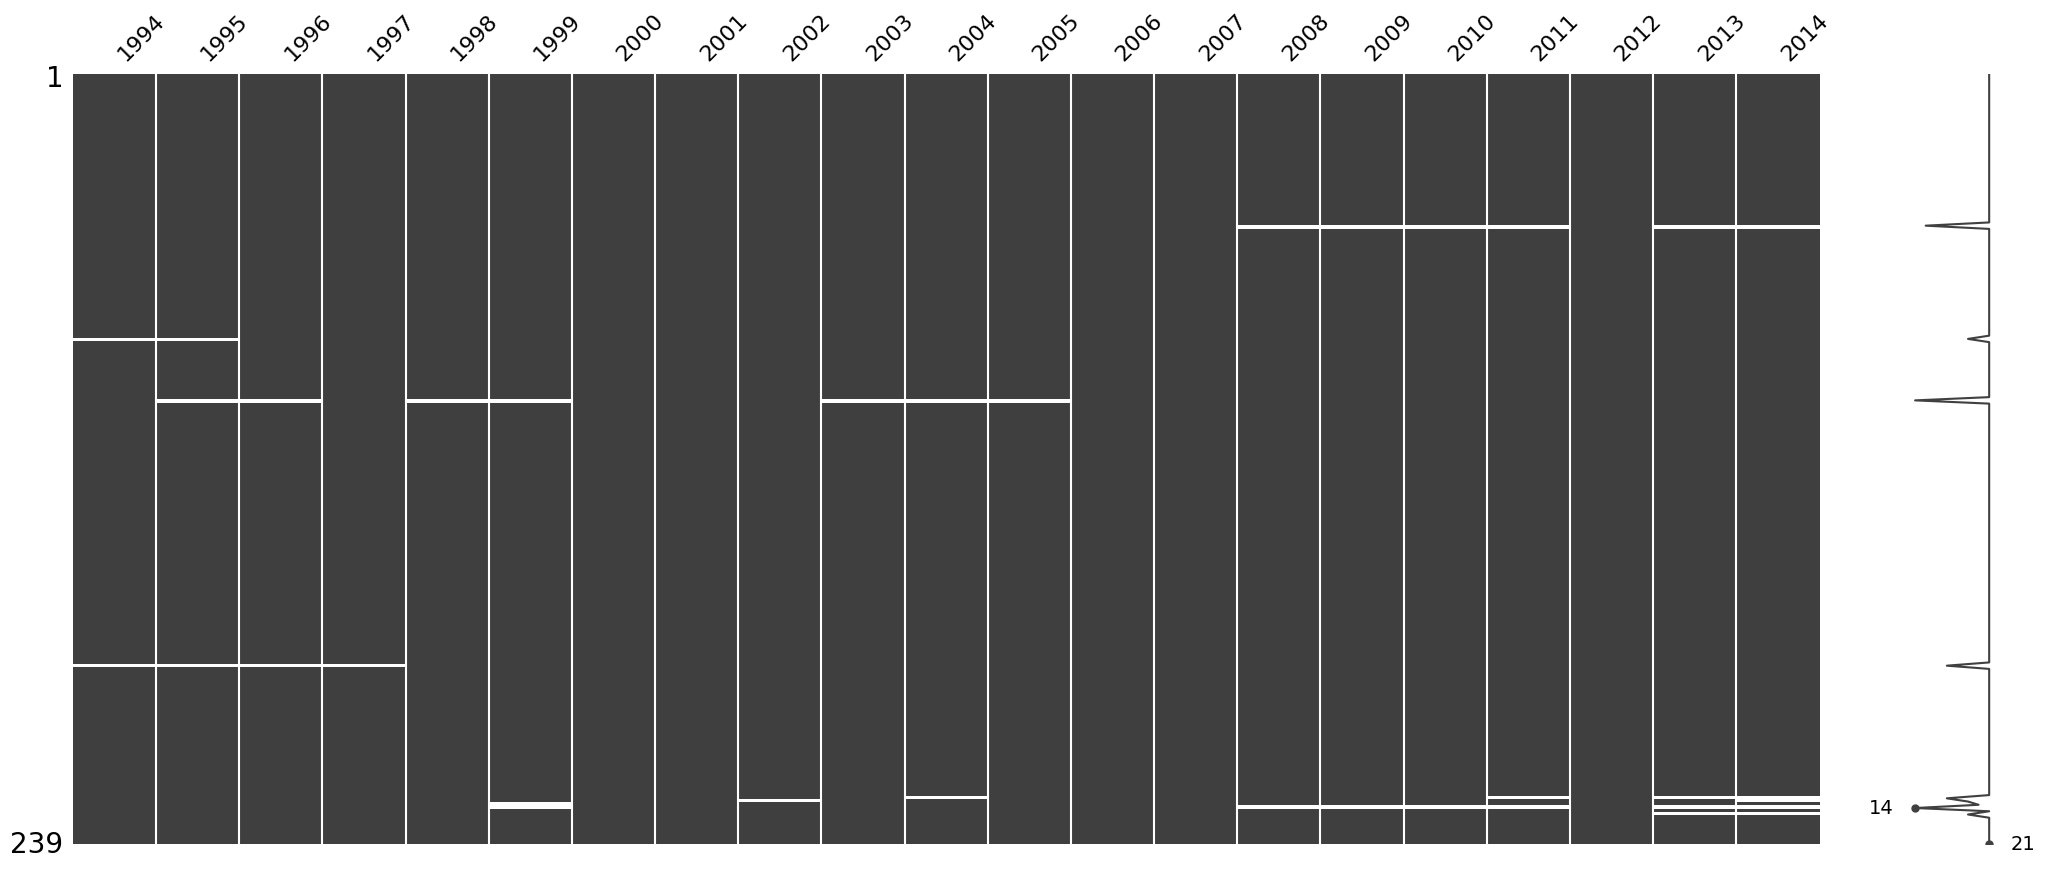

In [8]:

mno.matrix(df)

Figure 2: Our dataset after dropping all rows with at least 10 missing values. We now have exactly the number of zipcodes we need.

In [9]:

# Initialize KNN imputer with k=5
imputer = KNNImputer(n_neighbors=5)
# Fit and transform the data to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

In [10]:
df_imputed.shape

(239, 21)

<Axes: >

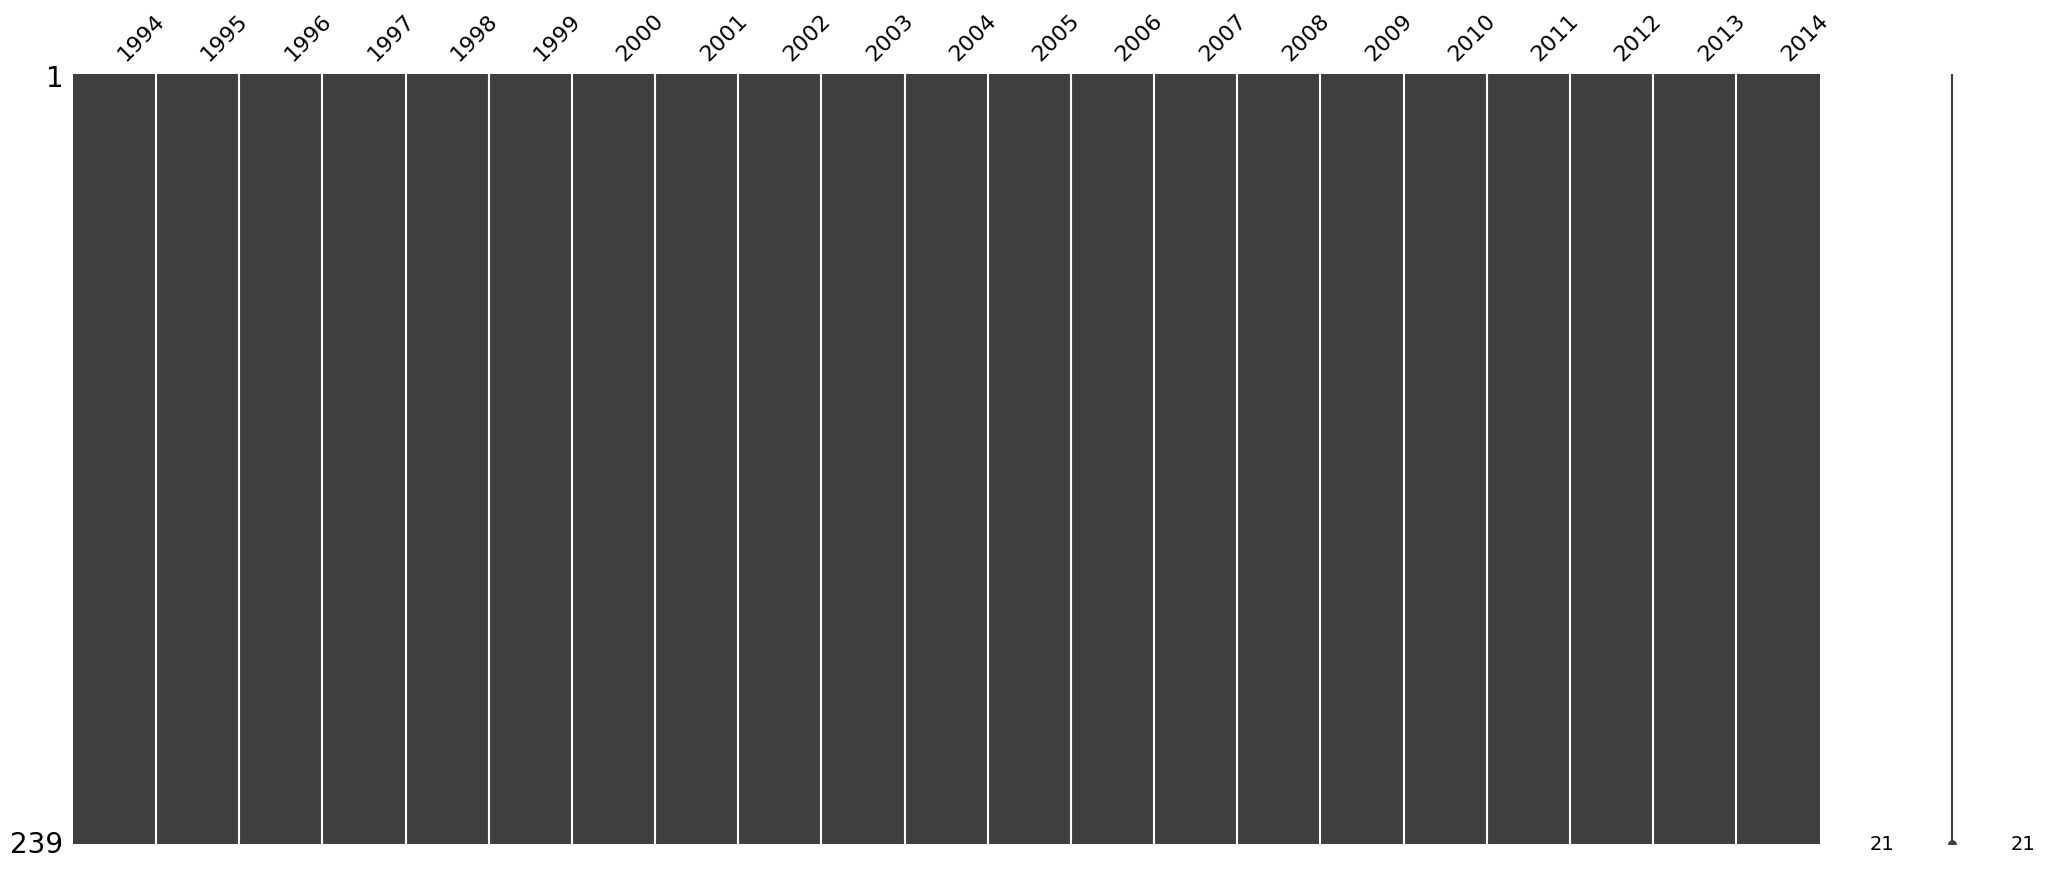

In [11]:
mno.matrix(df_imputed)

Figure 3: Our dataset after imputing the missing values using K nearest neighbors. Now there are no missing values.

# get the zipcodes shape file
by cloning the repo https://github.com/wimlds/smart_cities.git


In [12]:
#Make sure I'm in right directory
!ls

autoencoder_time_series_instructions_MLTSA25_RWolynetz.ipynb
Clustering_businesstimeseries_instructions_MLTSA25_RWolynetz.ipynb
data
smart_cities


In [28]:
!git clone https://github.com/wimlds/smart_cities.git #Don't run this again!

Cloning into 'smart_cities'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156 (from 1)
Receiving objects: 100% (156/156), 15.70 MiB | 11.22 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Updating files: 100% (64/64), done.


original data (263, 13)
after cleaning (248, 13)
ZIPCODES: 248 POLYGONS: 248 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 248


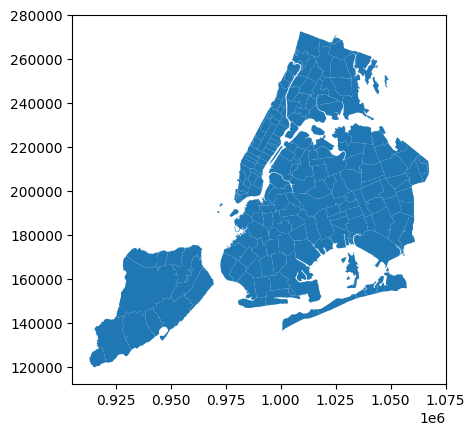

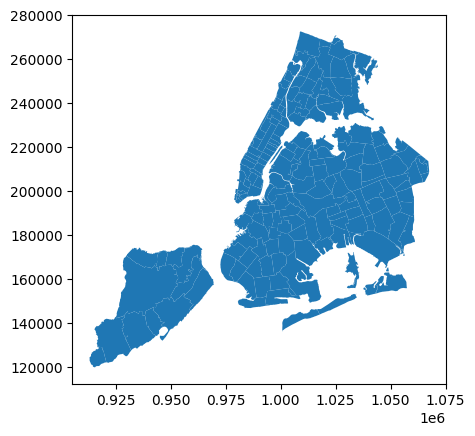

In [13]:
#look at the code and the plots below :
#I am using geopandas to plot maps of zipcodes from a shapefile and I am removing duplicate entries that have the same zipcode

nyczipsshp = gp.read_file( "smart_cities/NYC_shapefiles/ZIP_CODE_040114.zip")
print("original data", nyczipsshp.shape)
nyczipsshp.plot()

nyczipsshp = nyczipsshp.drop_duplicates("ZIPCODE")
print("after cleaning", nyczipsshp.shape)
nyczipsshp.plot()

print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

## TASKS:
    
    1. Scale and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to
    decide what a good number is here. try a few options, keeping in mind
    a few is more than a couple, but i recommand you stay within the
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of
    the clusters). you can plot for example the cluster centers overlayed on
    each time series (using the alpha channel to control the opacity in the
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is
    an exploratory tool so you do not want to jump to conclusions because
    you see some clusters! but seeing structure in your data can inform
    your next moves as an investigator.
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris.
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.*

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfTransposed = df_imputed.T #Gotta transpose to scale by the rows
scaler.fit(dfTransposed)

scaler.mean_

array([7.44761905e+01, 5.51333333e+02, 5.85428571e+02, 4.86857143e+02,
       1.28552381e+03, 1.01100000e+03, 2.23095238e+03, 8.65809524e+02,
       1.82409524e+03, 1.68838095e+03, 3.91333333e+02, 2.85238095e+02,
       5.86476190e+02, 9.87095238e+02, 9.85095238e+02, 3.16714286e+02,
       1.48619048e+02, 5.98476190e+02, 7.24142857e+02, 9.92142857e+02,
       5.26333333e+02, 9.15285714e+02, 9.77476190e+02, 5.03285714e+02,
       5.45523810e+02, 4.57238095e+02, 1.17271429e+03, 6.72523810e+02,
       4.37571429e+02, 6.86571429e+02, 5.92142857e+02, 4.82428571e+02,
       4.64285714e+02, 5.70047619e+02, 1.31571429e+02, 4.94619048e+02,
       7.25952381e+02, 3.21952381e+02, 2.10952381e+02, 8.24095238e+02,
       6.05238095e+02, 5.83000000e+02, 1.64571429e+02, 1.92561905e+03,
       5.33047619e+02, 2.71714286e+02, 4.68285714e+02, 5.87133333e+02,
       1.85004762e+03, 8.72238095e+02, 7.96285714e+02, 6.25190476e+02,
       6.38095238e+00, 3.50285714e+02, 8.38619048e+02, 1.63909524e+03,
      

In [15]:
vals = scaler.transform(dfTransposed).T
vals.shape
vals.mean(axis=1), vals.mean(axis=1).shape

(array([-2.85485921e-16, -3.38353684e-16, -2.11471052e-16,  3.38353684e-16,
        -4.86383420e-16, -2.11471052e-17,  6.66133815e-16, -4.75809868e-16,
         1.16309079e-16,  4.01794999e-16,  8.24737104e-16, -3.38353684e-16,
        -3.17206578e-16,  3.38353684e-16,  4.86383420e-16, -2.32618158e-16,
        -2.85485921e-16, -7.40148683e-17,  5.07530526e-16,  7.61295788e-16,
        -8.88178420e-16, -8.56457762e-16, -1.05735526e-16,  2.11471052e-16,
         1.48029737e-16, -6.34413157e-17, -1.20538500e-15,  8.45884209e-17,
         2.53765263e-16,  2.43191710e-16,  3.91221447e-16, -1.79750394e-16,
         2.11471052e-16,  1.16309079e-16, -3.27780131e-16,  6.34413157e-16,
        -2.32618158e-16, -4.01794999e-16, -4.01794999e-16,  2.74912368e-16,
         9.72766841e-16,  9.51619735e-17, -4.22942105e-16, -9.04038749e-16,
         2.32618158e-16, -6.34413157e-17,  1.05735526e-16,  8.98751972e-17,
         3.17206578e-17,  9.72766841e-16, -3.48927236e-16,  5.18104078e-16,
        -1.7

In [16]:
vals.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (248,)

vals.std(axis=1) should return 1 everywhere



# KM Clustering

In [17]:
vals.mean(axis = 0).shape

(21,)

create a kmeans model with 5 clusters

In [18]:
nc = 5
km = KMeans(n_clusters=nc, random_state=302).fit(vals)


In [19]:
km.cluster_centers_[0].shape

(21,)

### Plot and map the clusters.

First reflect on this: the center of a cluster is a point within the cluster. If your cluster is a cluster of time series its center is... A TIME SERIES! so your cluster centers should be time series of 21 points (1995-2015)

The cluster centers are extracted as km.center

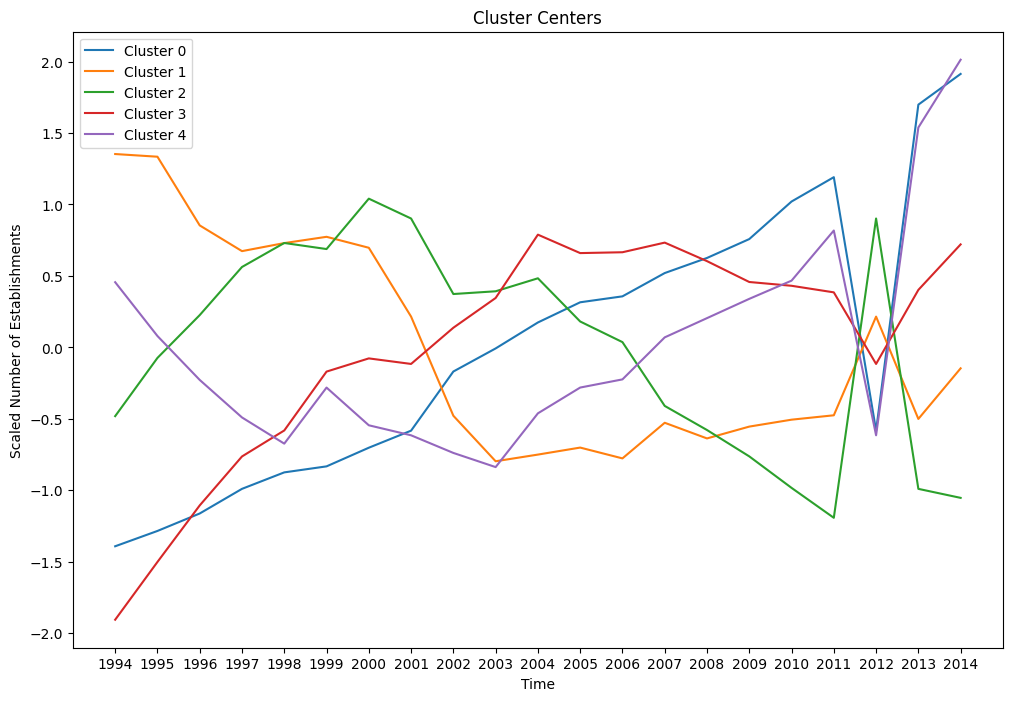

In [20]:

# Plot the cluster centers
plt.figure(figsize=(12, 8))
for i in range(nc):
    plt.plot(df_imputed.columns, km.cluster_centers_[i], label=f'Cluster {i}')
plt.xlabel('Time')
plt.ylabel('Scaled Number of Establishments')
plt.title('Cluster Centers')
plt.legend()
plt.show()


In [21]:
#plot just the centers here
km.cluster_centers_.shape


(5, 21)

Then plot also the time series that belong to the cluster, overplotting them on the cluster center (cluster center in blue, alpha=1, time series in black, alpha=0.3). The time series in a cluster can be found as km.labe

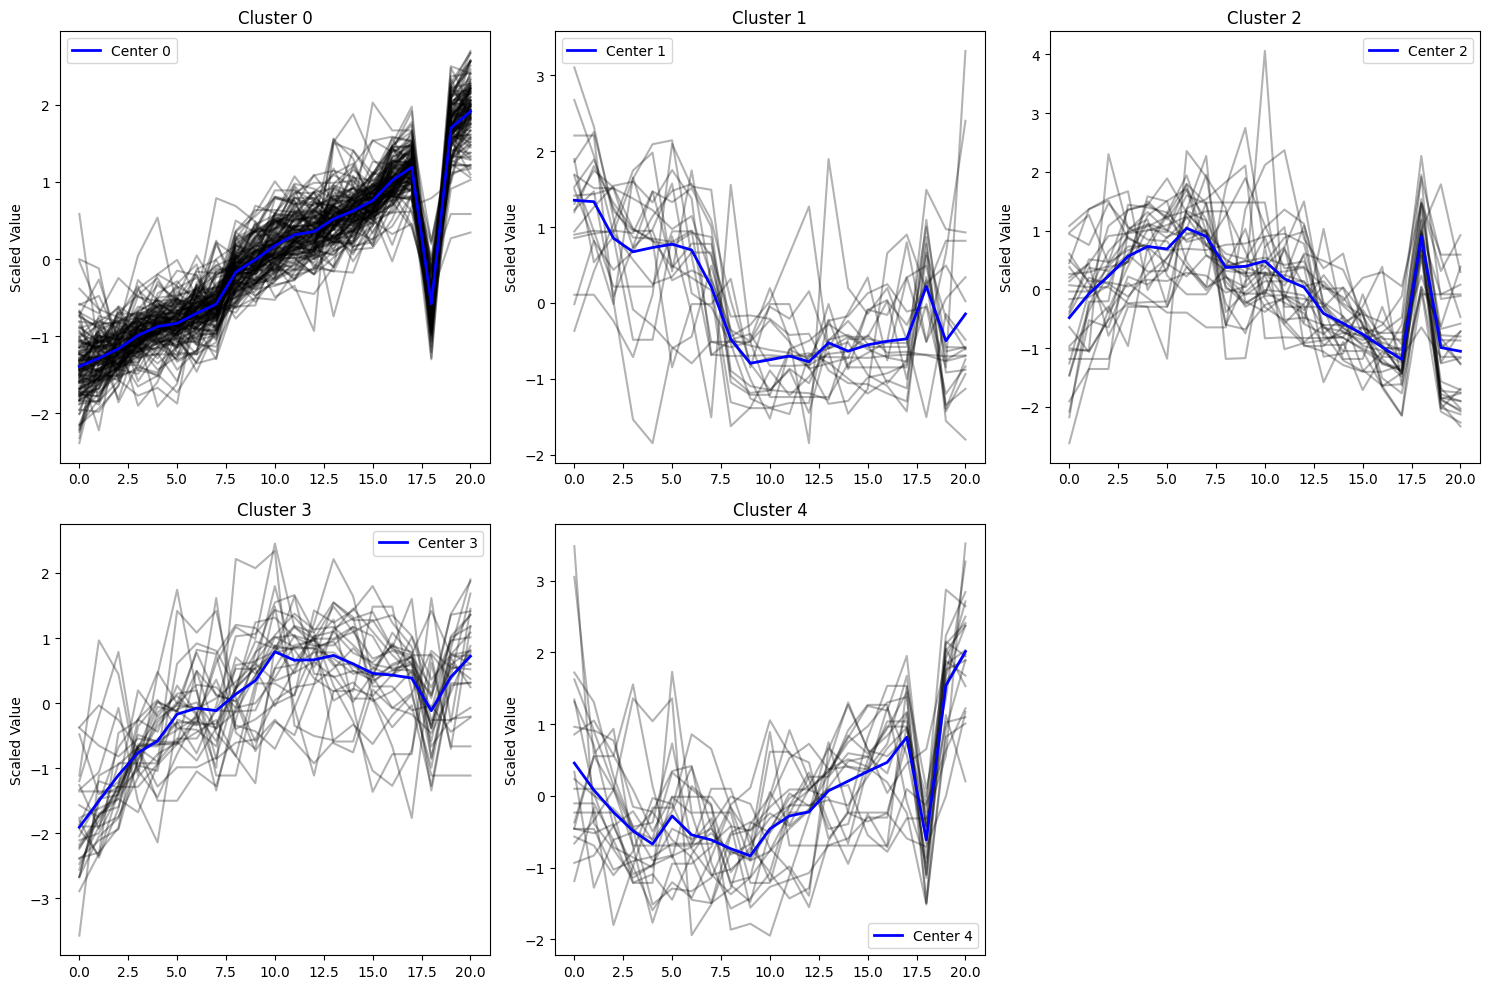

In [22]:
# prompt: Plot the time series belonging to each cluster in its own subplot. make sure to highlight the center in each subplot

# Plot the time series belonging to each cluster in its own subplot
plt.figure(figsize=(15, 10))

for i in range(nc):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    cluster_indices = np.where(km.labels_ == i)[0]
    cluster_data = vals[cluster_indices, :]

    for ts in cluster_data:
        plt.plot(ts, color='black', alpha=0.3)

    plt.plot(km.cluster_centers_[i], color='blue', linewidth=2, label=f'Center {i}', alpha = 1)

    plt.ylabel('Scaled Value')
    plt.title(f'Cluster {i}')
    plt.legend()

plt.tight_layout()
plt.show()


In [72]:
km.cluster_centers_[0].shape

(21,)

Map the zipcodes by color according to the cluster center - you can make a single map in 5 color or 5 maps in 1 color each


In [23]:
#create a dataframe with the cluster id per zipcode
clustersdf = pd.DataFrame()
clustersdf['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf['cluster'] = km.labels_
clustersdf.head()

,ZIPCODE,cluster
0,11436,0
1,11213,0
2,11212,0
3,11225,0
4,11218,0


In [24]:
#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

length of dataframes: 239 239 248


<ipython-input-25-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])
<ipython-input-25-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])
<ipython-input-25-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])
<ipython-input-25-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])
<ipython-input-25-f928b1633c5b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

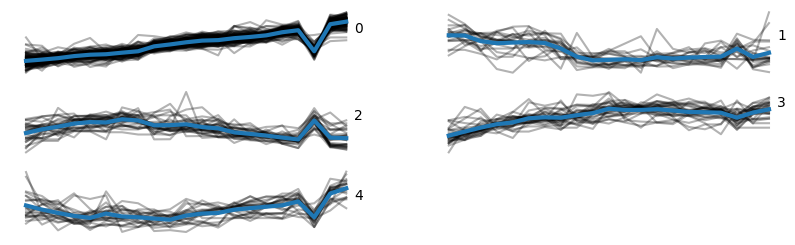

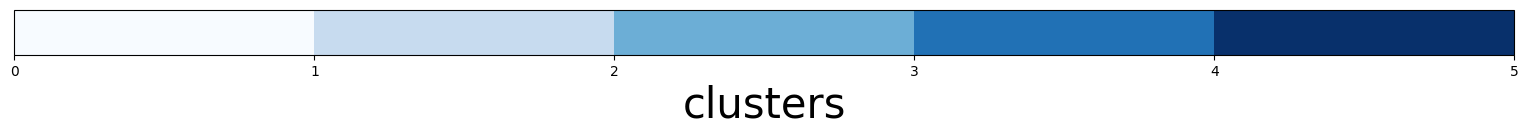

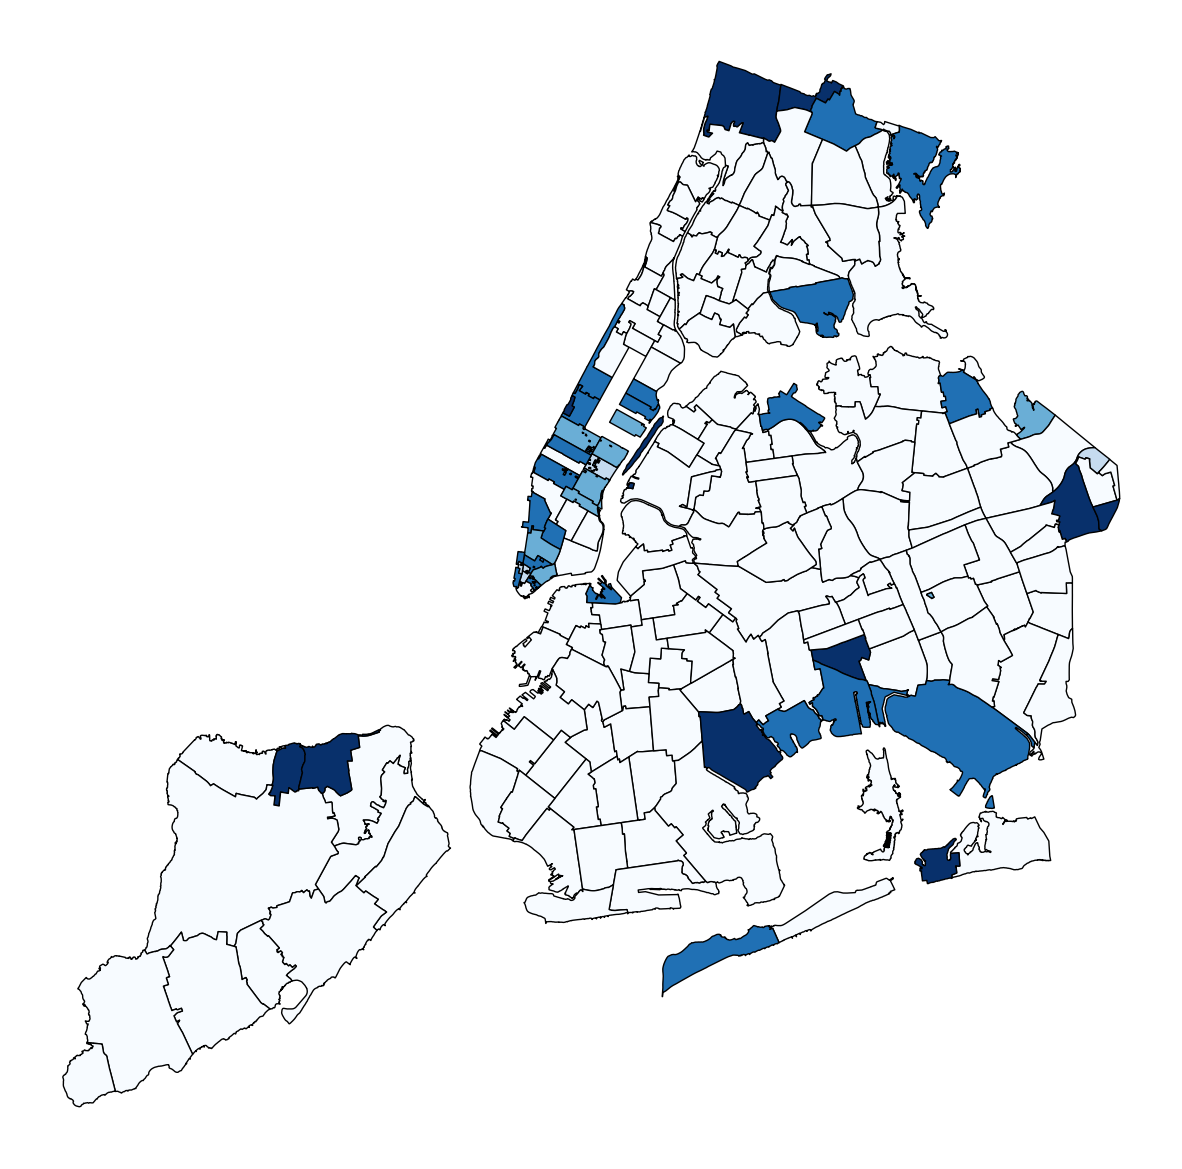

In [25]:
import matplotlib as mpl
fig = plt.figure(figsize=(10, 5))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(5, 2, (i + 1))

    for v in vals[km.labels_ == i]:
        ax.plot(np.arange(1994, 2015, 1), v, 'k-', alpha=0.3)
    ax.text(2014.5, 1, "%d" % i)

    plt.xticks(fontsize=10)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2015, 1), Xc, lw=3)
    plt.grid(False)
    plt.axis('off')
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.
bounds = range(nc + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Blues', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

Figure 4: (Top) A plot of the 5 clusters with their respective centers outlined in bue. (Bottom) a map of NYC subdivided into its various zipcodes. The zipcodes are highlighted in accordance with the cluster they belong to. We can see from the map that there are a lot more zipcodes belonging to cluster 0, this is to be expected since the plot of the cluster itself shows many more time series than the other plots. It seems unlikely that so many zipcodes would experience similar trends in business growth, which suggests that a kMeans model may not be appropriate for this data.

### Figure 3:
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

Can you parse some business and socioeconomic dynamics from this plot?

create 8 kmeans models with 2-10 cluster centers. put each model in a list

(array([0, 1], dtype=int32), array([183,  56]))
(array([0, 1, 2], dtype=int32), array([180,  26,  33]))
(array([0, 1, 2, 3], dtype=int32), array([150,  26,  32,  31]))
(array([0, 1, 2, 3, 4], dtype=int32), array([142,  19,  29,  28,  21]))
(array([0, 1, 2, 3, 4, 5], dtype=int32), array([142,  20,  25,   7,  21,  24]))
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([138,  20,  22,   9,  17,  25,   8]))
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([136,  22,  14,  13,  10,  17,  19,   8]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([96, 22, 13, 12, 10, 11, 16,  8, 51]))


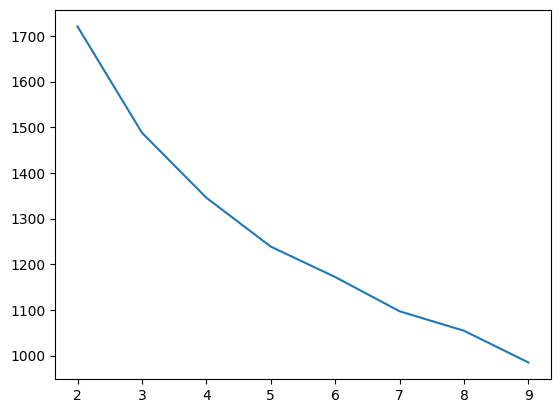

In [82]:
kms = []
for nc in range(2,10):
  #cluster with kmeans
  kms.append(KMeans(n_clusters=nc, random_state=302).fit(vals))
#each observation in the km object has a label:
#that is the cluster assigned to that observation
for km in kms:
  print(np.unique(km.labels_, return_counts=True))
import pylab as plt
plt.plot(range(2,10), [km.inertia_ for km in kms])

QUESTION: was the number 5 clusters justified by the data? explain

The inertia plot above does not appear to have a clear elbow point, so finding the optimal number of clusters may not be straightforward, but we can approximate it at around 6 clusters.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

# repeating the exercise using DBSCAN or hyerarchical agglomerative clustring...

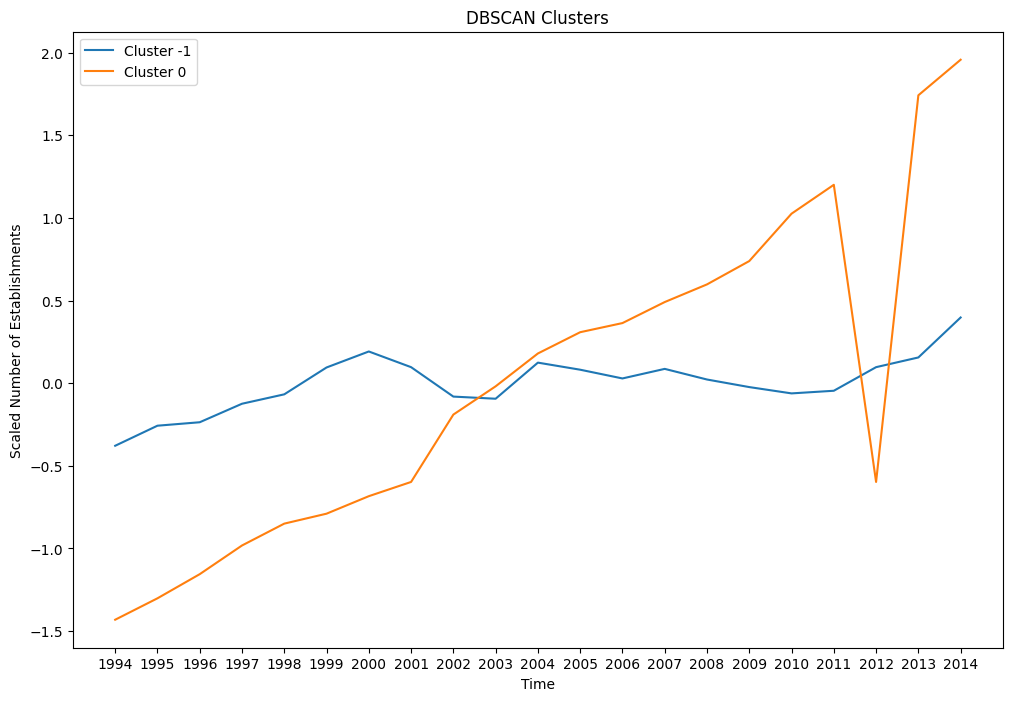

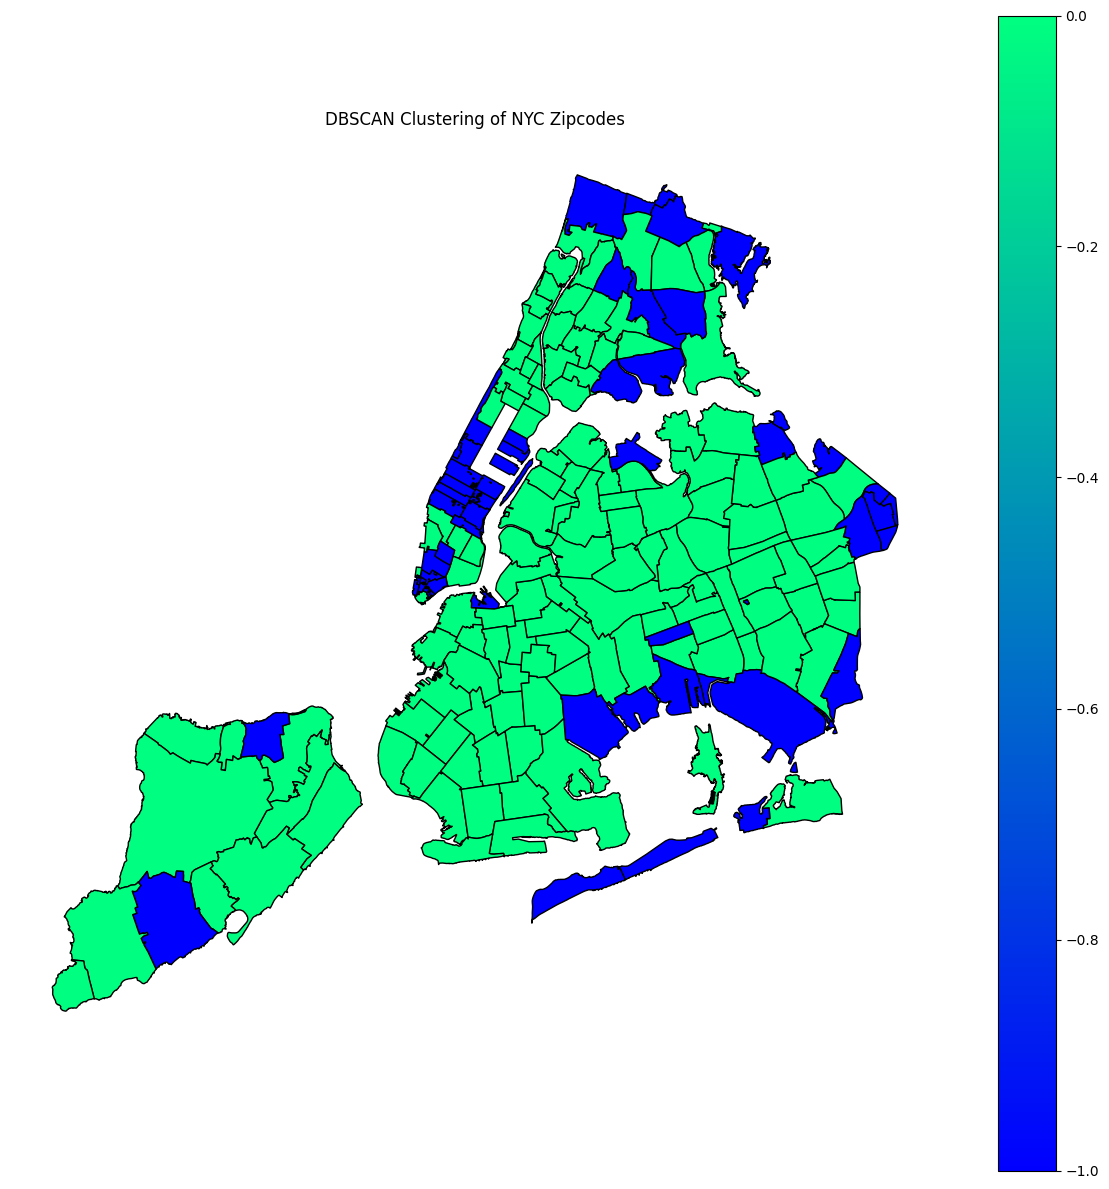

Number of KMeans clusters: 5
Number of DBSCAN clusters: 2


In [44]:
# prompt: Use a DBSCAN model to cluster our dataset.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=7).fit(vals) # You might need to adjust eps and min_samples


# Plot the clusters from DBSCAN
plt.figure(figsize=(12, 8))
for i in np.unique(dbscan.labels_):
    plt.plot(df_imputed.columns, vals[dbscan.labels_ == i].mean(axis=0), label=f'Cluster {i}')
plt.xlabel('Time')
plt.ylabel('Scaled Number of Establishments')
plt.title('DBSCAN Clusters')
plt.legend()
plt.show()


# Map the zipcodes by color according to the DBSCAN cluster
clustersdf_dbscan = pd.DataFrame()
clustersdf_dbscan['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf_dbscan['cluster'] = dbscan.labels_

mergednyz_dbscan = nyczipsshp.merge(clustersdf_dbscan, on='ZIPCODE', how='inner')

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
mergednyz_dbscan.plot(column='cluster', cmap='winter', alpha=1, ax=ax, legend=True, ec='k') # Use a different colormap
ax.axis('off')
plt.title("DBSCAN Clustering of NYC Zipcodes")
plt.show()

# Compare DBSCAN and KMeans results (e.g., number of clusters, cluster assignments)
print("Number of KMeans clusters:", len(np.unique(km.labels_)))
print("Number of DBSCAN clusters:", len(np.unique(dbscan.labels_)))
#Further comparison can include metrics like silhouette score.


### Figure 9:
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

In [ ]:
....

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

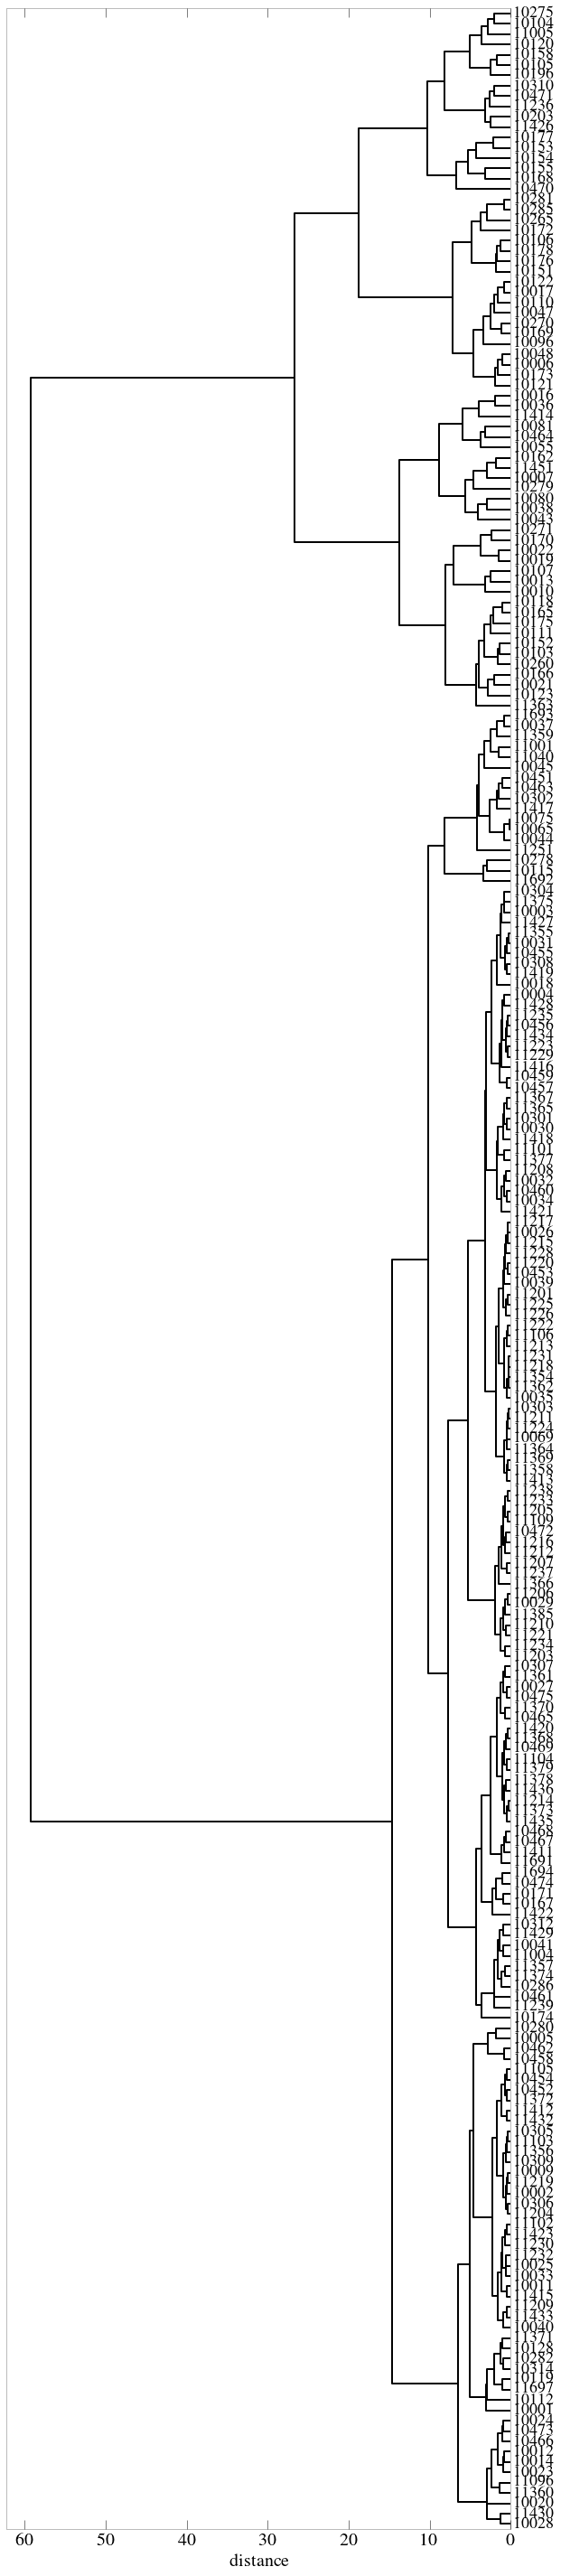

In [ ]:
import scipy.cluster as scp
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


In [ ]:
!pwd

/nfshome/fb55/PUI2017_fb55/HW11_fb55
